Mathematical Transformation

In [1]:
import numpy as np 
import pandas as pd 

In [37]:
import scipy.stats as stats #For Q-Q Plot

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv(r'c:\Users\Utsav\Downloads\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1=df.iloc[:,[1,5,9]]

In [7]:
df1.sample(5)

,Survived,Age,Fare
43,1,3.0,41.5792
107,1,NaN,7.7750
843,0,34.5,6.4375
175,0,18.0,7.8542
834,0,18.0,8.3000


In [11]:
df1.Age.fillna(value=(df1.Age.mean()),inplace=True)

C:\Users\Utsav\AppData\Local\Temp\ipykernel_8344\2708426780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Age.fillna(value=(df1.Age.mean()),inplace=True)


In [12]:
df1.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [15]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

C:\Users\Utsav\AppData\Local\Temp\ipykernel_8344\189055688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

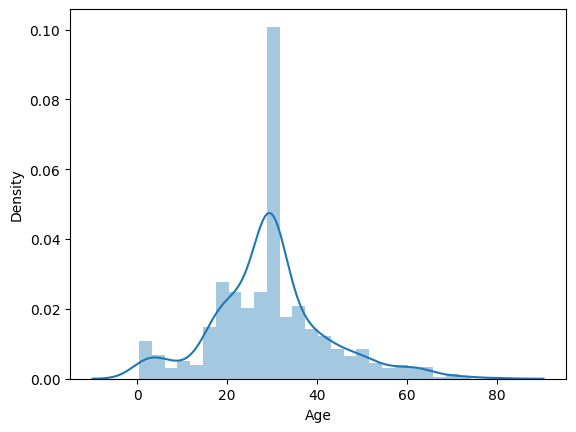

In [33]:
sns.distplot(x_train['Age'])

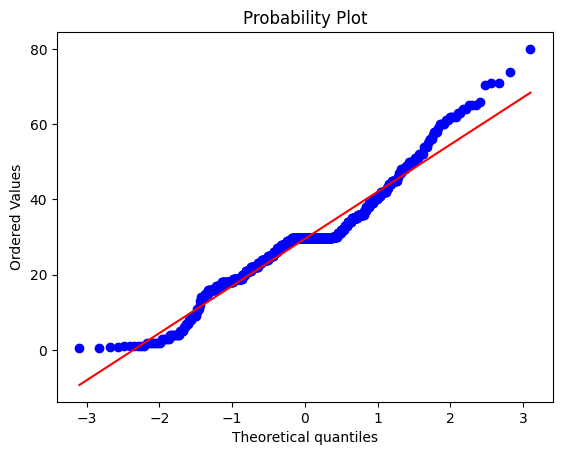

In [30]:
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.show()

C:\Users\Utsav\AppData\Local\Temp\ipykernel_8344\1342796766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

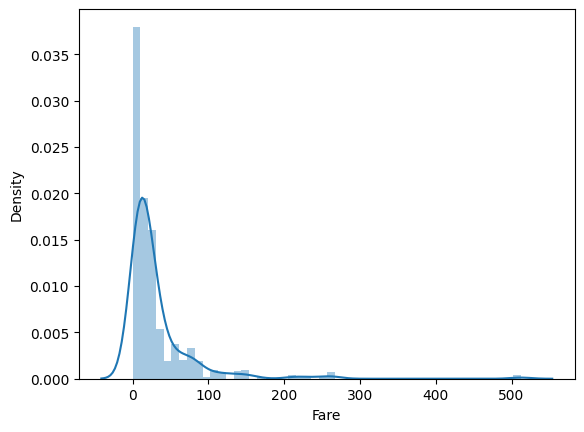

In [34]:
sns.distplot(x_train['Fare'])

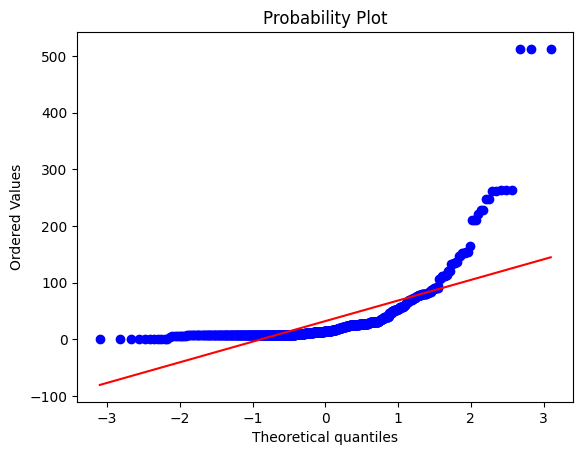

In [36]:
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.show()

In [38]:
model1=LogisticRegression()
model2=DecisionTreeClassifier()

In [39]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
model1.score(x_test,y_test)

0.6536312849162011

In [42]:
model2.score(x_test,y_test)

0.5921787709497207

Now using function transformer 

In [50]:
trf=FunctionTransformer(func=np.log1p)

#simple log doesn't work for 0 
# so log1p first adds 1 to the data and then takes a log

In [44]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

In [45]:
model1=LogisticRegression()
model2=DecisionTreeClassifier()

In [46]:
model1.fit(x_train_transformed,y_train)
model2.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [48]:
model1.score(x_test_transformed,y_test)

0.6703910614525139

In [49]:
model2.score(x_test_transformed,y_test)

0.6033519553072626

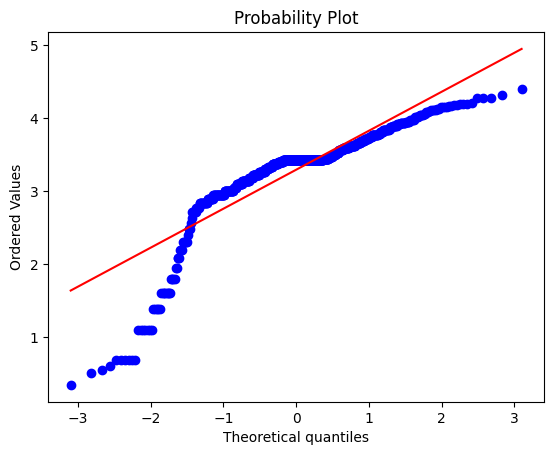

In [52]:
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.show()

In [54]:
x_transformed=trf.fit_transform(x)

model1=LogisticRegression()
model2=DecisionTreeClassifier()

print(np.mean(cross_val_score(model1,x_transformed,y,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(model2,x_transformed,y,scoring='accuracy',cv=10)))

0.678027465667915
0.6543695380774033


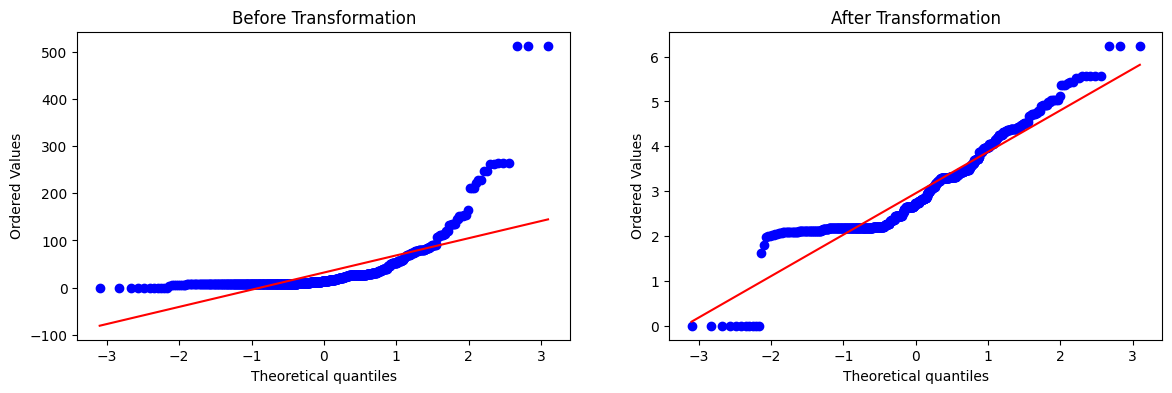

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Before Transformation')
plt.subplot(1,2,2)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('After Transformation')
plt.show()

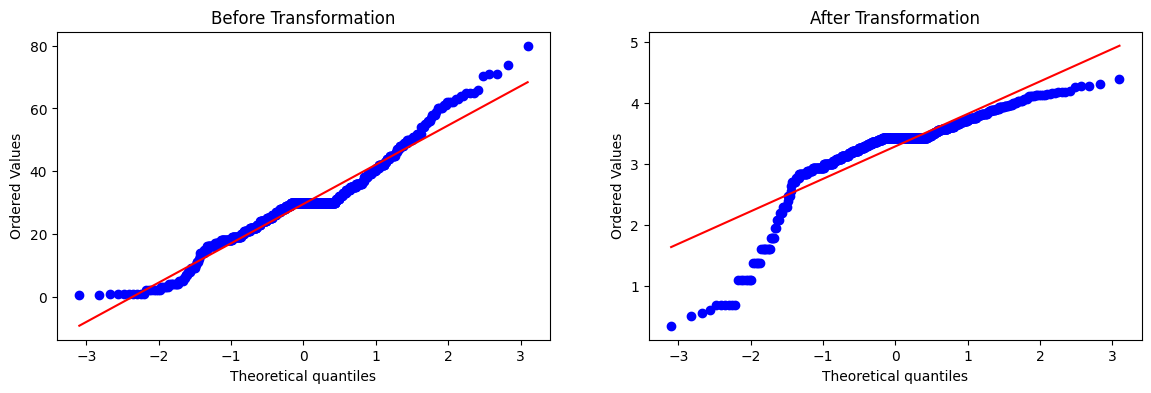

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Before Transformation')
plt.subplot(1,2,2)
stats.probplot(x_train_transformed['Age'],dist="norm",plot=plt)
plt.title('After Transformation')
plt.show()

In [59]:
ct=ColumnTransformer(transformers=[
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [62]:
x_train2=ct.fit_transform(x_train)
x_test2=ct.transform(x_test)

In [63]:
model=LogisticRegression()
model1=DecisionTreeClassifier()

In [66]:
model.fit(x_train2,y_train)
model1.fit(x_train2,y_train)

DecisionTreeClassifier()

In [67]:
model.score(x_test2,y_test)

0.6703910614525139

In [68]:
model1.score(x_test2,y_test)

0.5921787709497207

Is Function mein hum ek function pass krte hain aur ye fir fare column ko us function ke according transform krke hume accuracy aur graph plot krke deta hain

In [72]:
def apply_transform(transform):
    trf1=ColumnTransformer(transformers=[
        ('one',FunctionTransformer(transform),['Fare'])
    ],remainder='passthrough')

    x_transformed=trf1.fit_transform(x)

    model=LogisticRegression()

    print(np.mean(cross_val_score(model,x_transformed,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    stats.probplot(x['Fare'],dist="norm",plot=plt)
    plt.title('Before Transformation')
    plt.subplot(1,2,2)
    stats.probplot(x['Fare'],dist="norm",plot=plt)
    plt.title('After Transformation')
    plt.show()

0.61729088639201


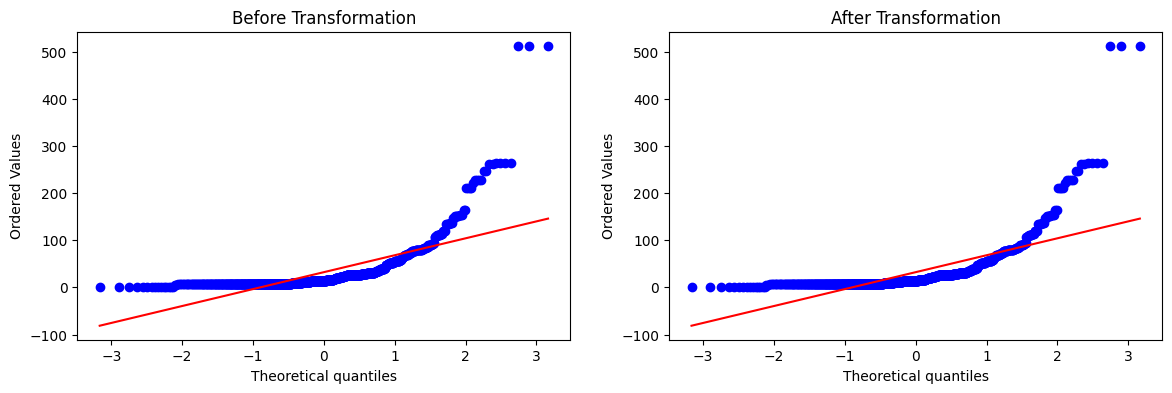

In [79]:
apply_transform(lambda x: 1/(x+0.00001))